In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits 
import glob 

In [2]:
from astropy.modeling.models import Gaussian2D

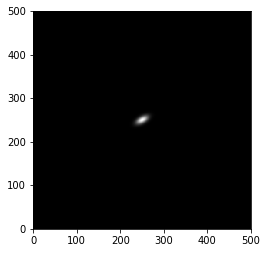

In [3]:
y,x = np.mgrid[0:500, 0:500]
data = Gaussian2D(1, 250, 250, 10, 5, theta=0.5)(x,y)

plt.imshow(data, origin='lower', cmap='gray')
plt.show()

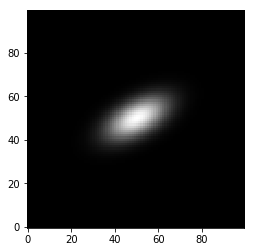

In [4]:
crop_center = (250, 250)
crop_size = units.Quantity((100,100), units.pixel)

crop = Cutout2D(data, crop_center, crop_size)
plt.imshow(crop.data, origin='lower', cmap='gray')
plt.show()

# Reading in the FITS data, getting the data we need 

## a)  

In [10]:
hdulist = fits.open('archivo.gz')
hdulist.info()

Filename: archivo.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     196   (800, 800, 4)   int16 (rescales to float32)   
  1  w0ck0101t_cvt.c0h.tab    1 TableHDU       194   4R x 37C   [D25.16, D25.16, D25.16, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I11, E15.7, I11, I11, A24, A24, A8, A8, A8, I11, E15.7, E15.7, E15.7, E15.7, I11, I11, I11, I11, I11, I11, I11, A24, E15.7, E15.7, E15.7, E15.7]   


In [13]:
header = hdulist[0].header
header 

SIMPLE  =                    T /  FITS STANDARD                                 
BITPIX  =                   16 /  FITS BITS/PIXEL                               
NAXIS   =                    3 /  NUMBER OF AXES                                
NAXIS1  =                  800 /                                                
NAXIS2  =                  800 /                                                
NAXIS3  =                    4 /                                                
BLOCKED =                    T /  Tape may be blocked                           
EXTEND  =                    T /  There maybe standard extensions               
BSCALE  =   6.2125842314785E-1 /  REAL = TAPE*BSCALE + BZERO                    
BZERO   =    1.1643245605469E4 /                                                
OPSIZE  =                 1856 /  PSIZE of original image                       
ORIGIN  = 'STScI-STSDAS'       /                                                
FITSDATE= '10/09/90'        

In [12]:
header['']

KeyError: "Keyword 'OBJECT' not found."

In [14]:
data = hdulist[0].data

In [15]:
data.shape

(4, 800, 800)

In [71]:
print 'El número de pixeles Nx es:', header['NAXIS1']
print 'El número de pixeles Ny es:', header['NAXIS2']
print 'La escala de ángulo de cada pixel Nx en arcsec es:', header['XPIXSIZE']
print 'La escala de ángulo de cada pixel Ny en arcsec es:', header['YPIXSIZE']
print 'La coordenada referencial Nx de la imagen es:', header['CRPIX1']

print 'La coordenada referencial Ny de la imagen es:', header['CRPIX2']

El número de pixeles Nx es: 3442
El número de pixeles Ny es: 5614
La escala de ángulo de cada pixel Nx en arcsec es: 1.24500000477
La escala de ángulo de cada pixel Ny en arcsec es: 1.24500000477
La coordenada referencial Nx de la imagen es: 1716.5
La coordenada referencial Ny de la imagen es: 2822.5


## b) 

TypeError: Invalid dimensions for image data

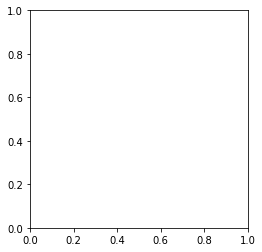

In [19]:
plt.imshow(data)
plt.savefig('trapezium1.pdf')

## c) 

In [2]:
from matplotlib.colors import LogNorm

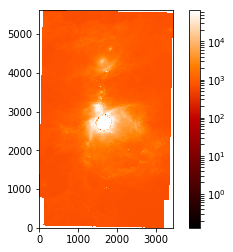

In [68]:
plt.imshow(data, origin='lower', cmap= plt.cm.gist_heat, norm=LogNorm())
plt.colorbar()
plt.savefig('trapezium2.pdf')

In [4]:
hdu = fits.open('archivo.gz')

In [8]:
data = hdu[0].data[0,:,:]

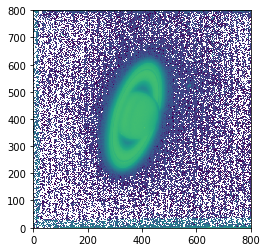

In [15]:
plt.imshow(data,origin='lower',norm=LogNorm())
plt.savefig('saturn.pdf')